### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

### Read and load Dataset into pandas DataFrame

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.isnull().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

#### There are missing values so we need to do median value imputation

In [5]:
df['children'].fillna(df['children'].median(),inplace=True)

In [6]:
numerical_cols = [feature for feature in df.columns if df[feature].dtype!='O']
numerical_cols

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [7]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype=='O']
categorical_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

#### Creating a target column

In [8]:
df['Total_visitors'] = df['adults'] + df['children'] + df['babies']


In [9]:
len(df['Total_visitors'].unique())

15

In [10]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [11]:
df['hotel'].value_counts()/len(df['hotel'])*100

City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

In [16]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Total_visitors'],
      dtype='object')

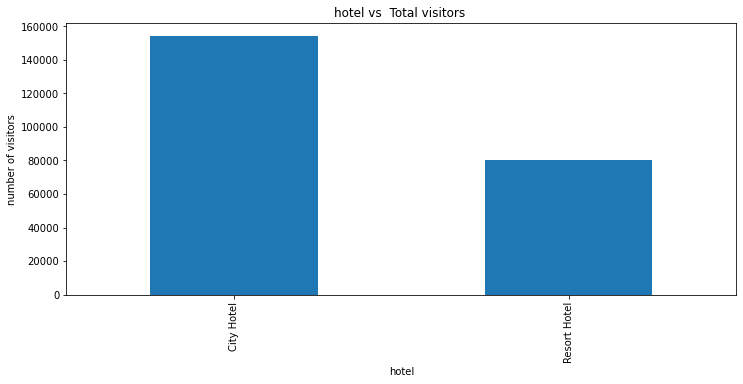

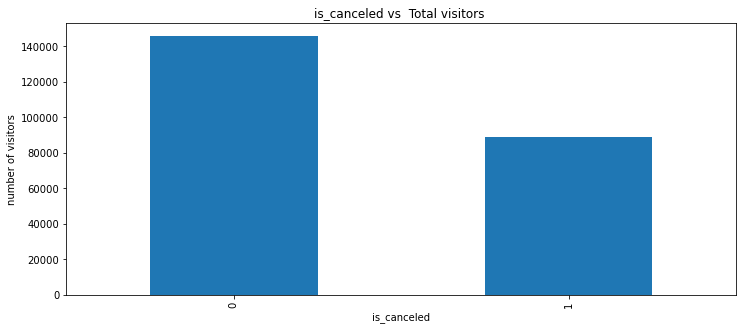

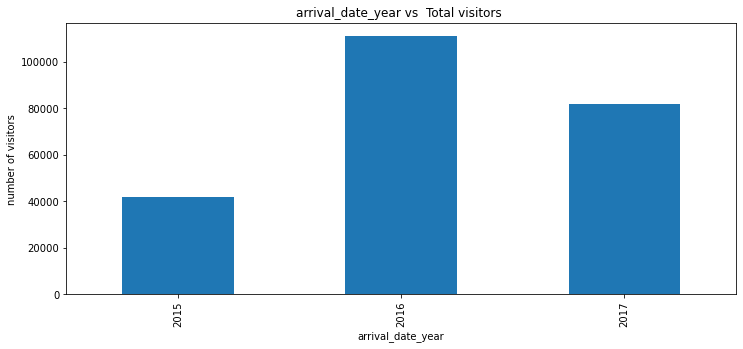

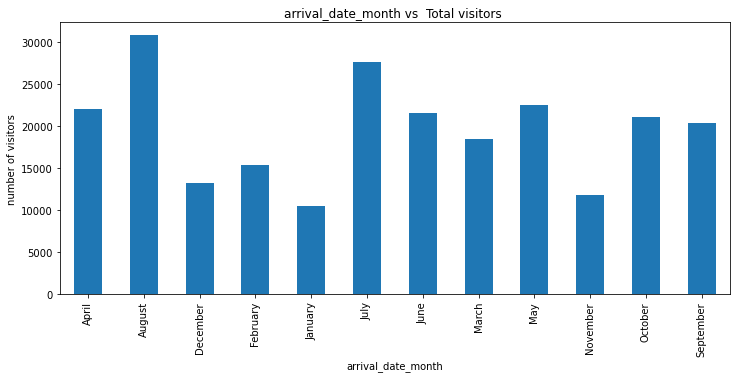

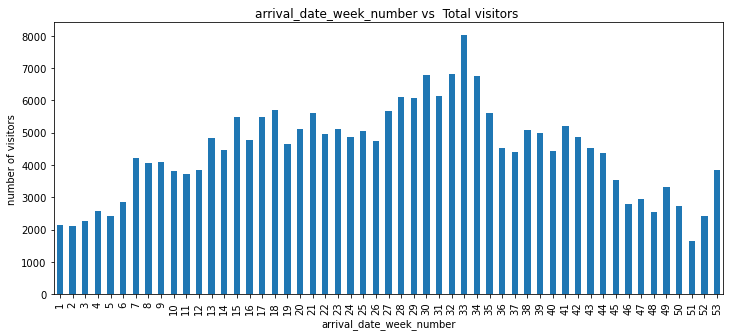

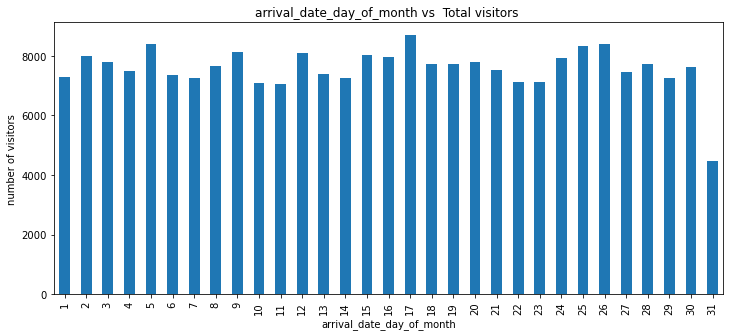

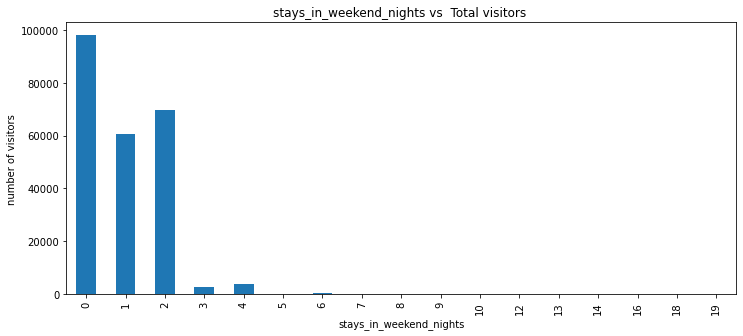

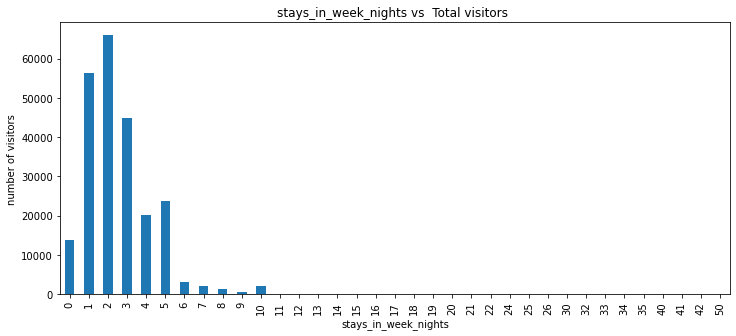

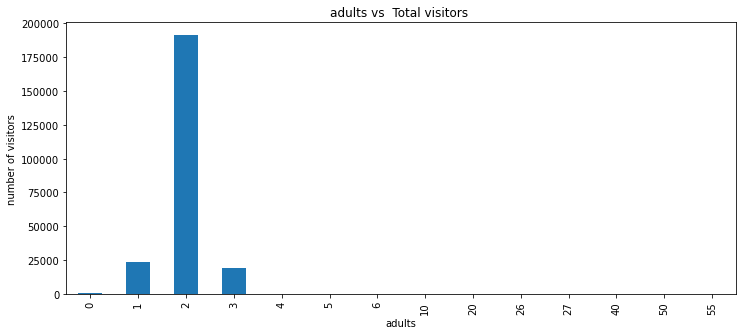

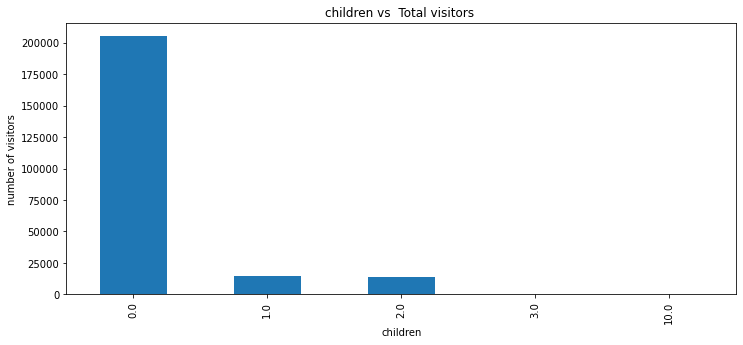

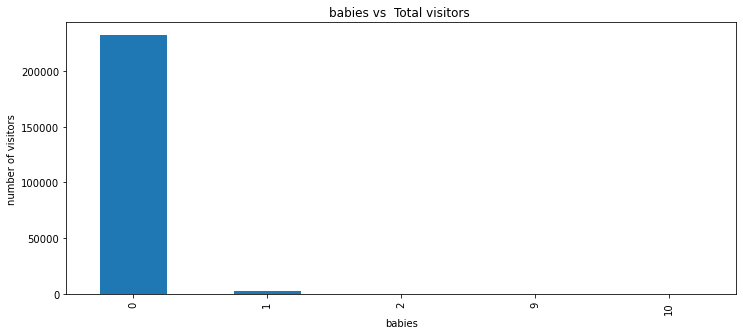

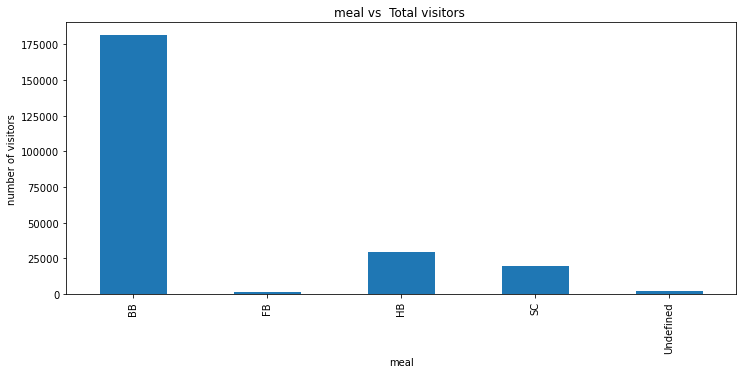

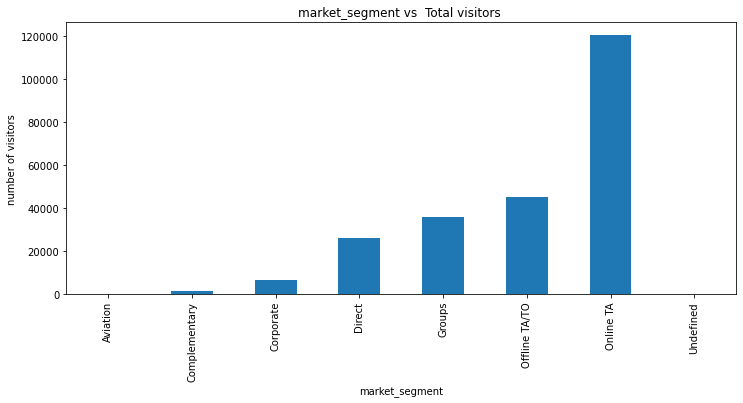

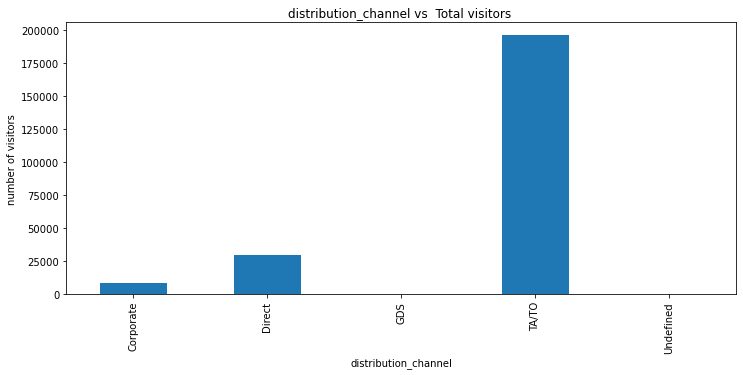

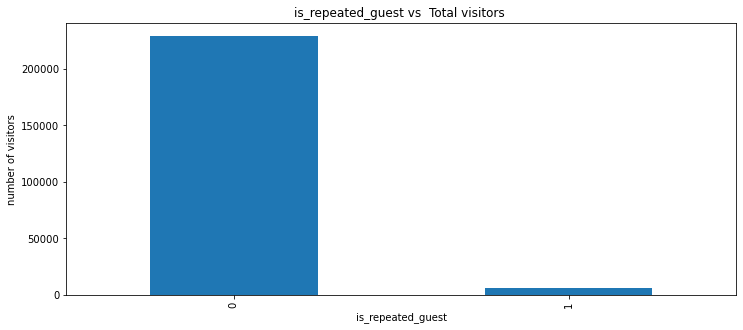

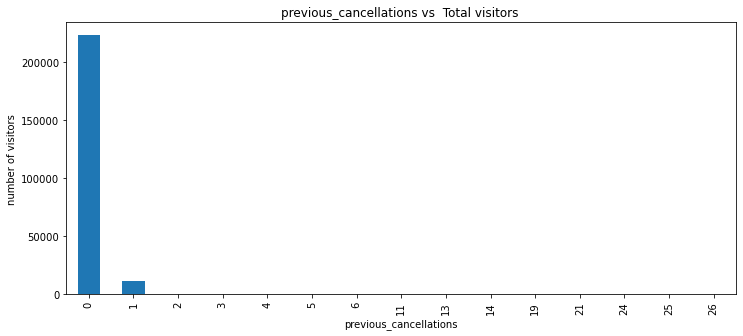

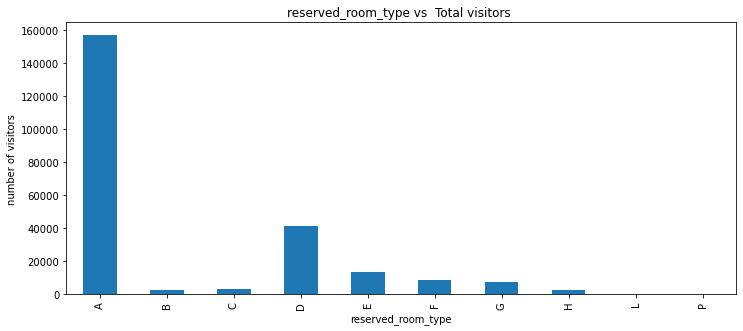

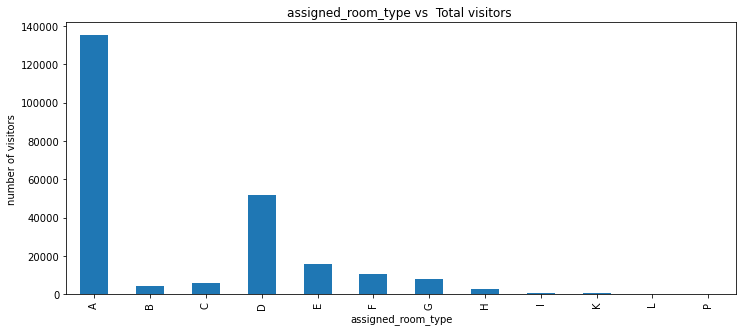

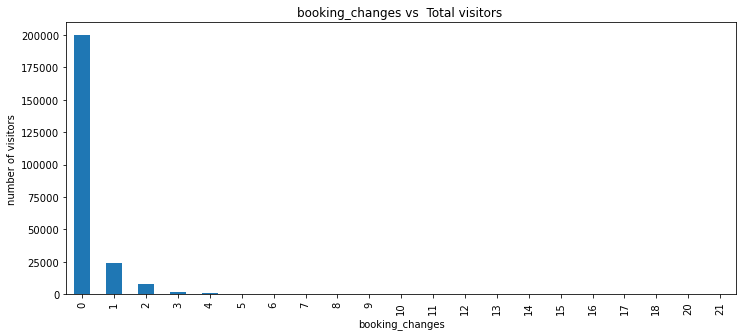

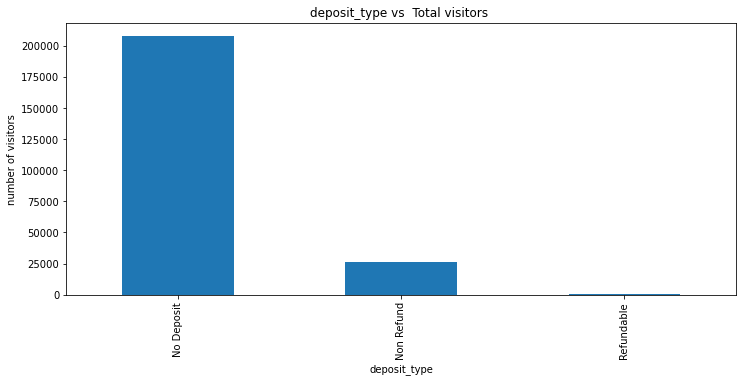

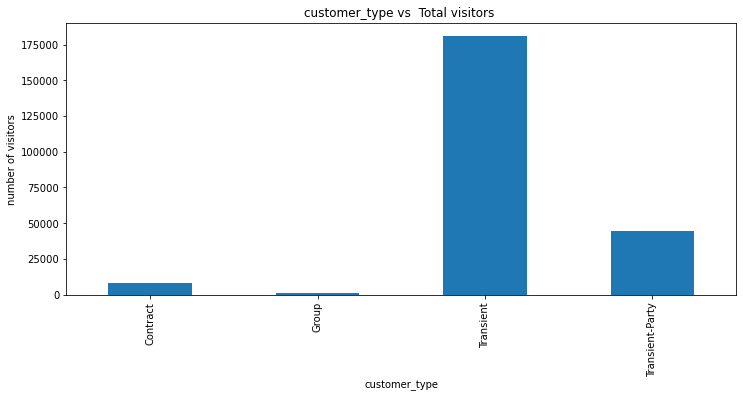

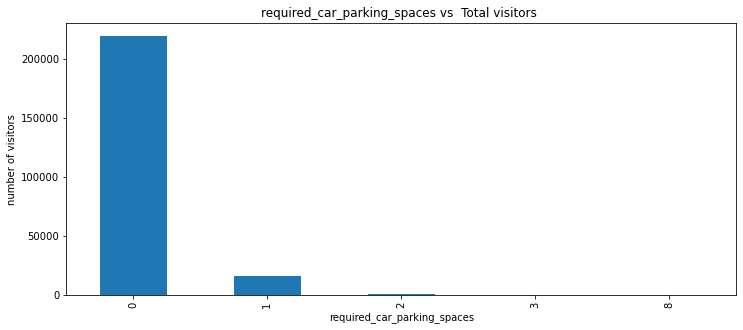

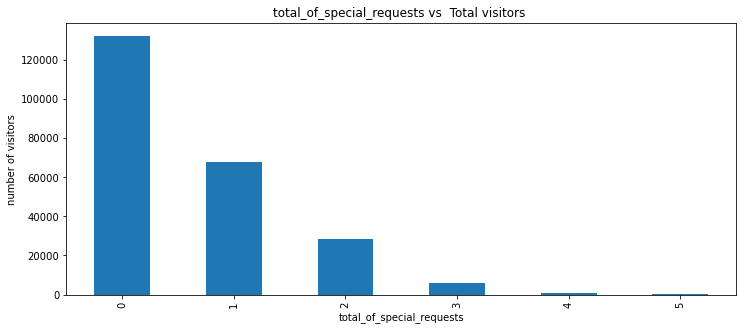

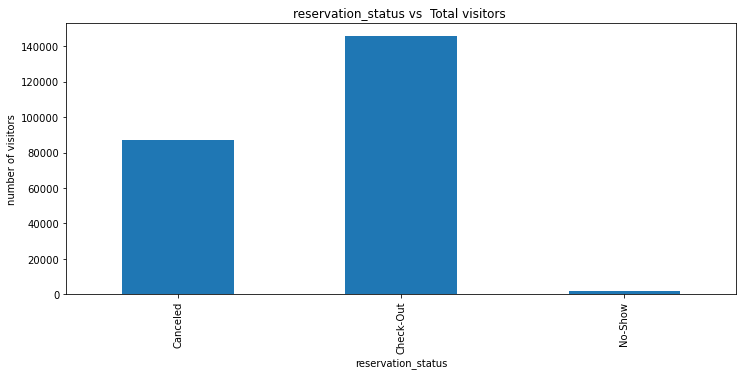

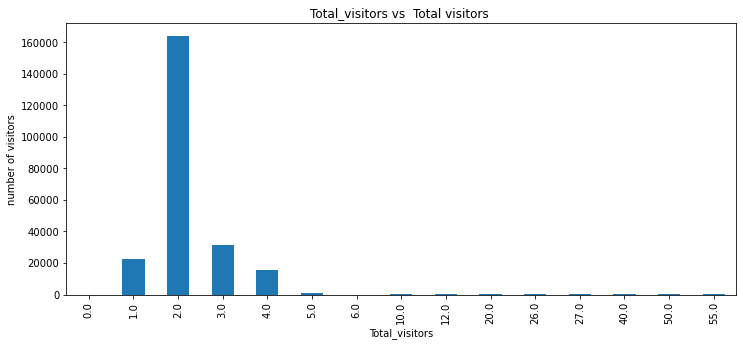

['lead_time',
 'country',
 'previous_bookings_not_canceled',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'reservation_status_date']

In [18]:
unplotted_cols = []
for feature in df.columns:
    if len(df[feature].unique()) < 55:
        plt.figure(figsize=(12,5))
        df.groupby(feature)['Total_visitors'].sum().plot.bar()
        plt.title(f'{feature} vs  Total visitors ')
        plt.ylabel('number of visitors')
        plt.xlabel(feature)
        plt.show()
    else:
        unplotted_cols.append(feature)
unplotted_cols

#### Bivariate Analysis of Hotel and is_cancelled column

hotel         Total_visitors
City Hotel    2.0               53935
              1.0               15568
              3.0                7706
              4.0                1860
              0.0                 167
              5.0                  92
              10.0                  1
              12.0                  1
Resort Hotel  2.0               28116
              1.0                7013
              3.0                2789
              4.0                2069
              5.0                  45
              0.0                  13
              26.0                  5
              20.0                  2
              27.0                  2
              6.0                   1
              10.0                  1
              12.0                  1
              40.0                  1
              50.0                  1
              55.0                  1
Name: Total_visitors, dtype: int64


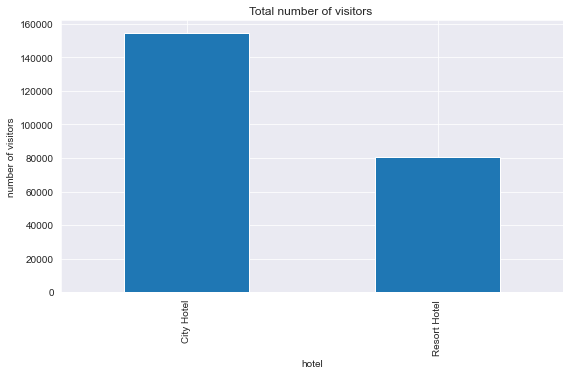

In [19]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
print(df.groupby('hotel')['Total_visitors'].value_counts())
df.groupby('hotel')['Total_visitors'].sum().plot.bar()
plt.title('Total number of visitors ')
plt.ylabel('number of visitors')
plt.show()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64


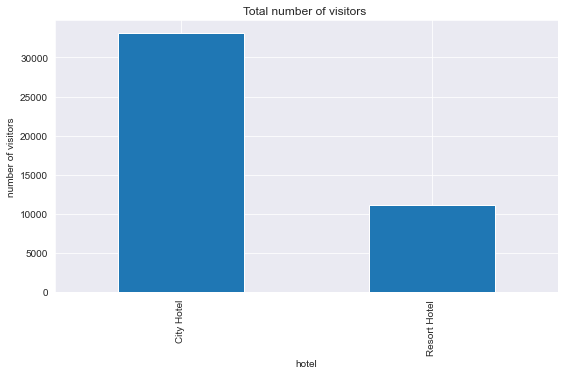

In [20]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
print(df.groupby('hotel')['is_canceled'].value_counts())
df.groupby('hotel')['is_canceled'].sum().plot.bar()
plt.title('Total number of visitors ')
plt.ylabel('number of visitors')
plt.show()

####  => 70% of the bookings in City Hotel were canceled  and 37% of bookings in resort hotel were canceled 

Text(0.5, 1.0, 'Hotel')

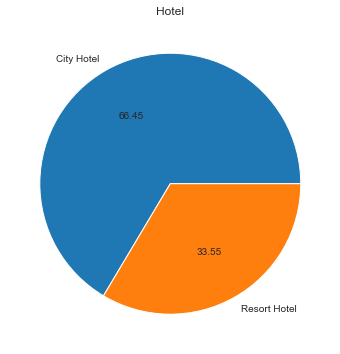

In [21]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.pie(df['hotel'].value_counts(),labels=df['hotel'].value_counts().index,autopct='%0.02f')
plt.title('Hotel')

#### One Hot Encoding 

In [22]:
dummy = pd.get_dummies(df['hotel'],prefix='hotel')
df.drop('hotel',inplace=True,axis=1)
df = pd.concat([df,dummy],axis=1)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_visitors,hotel_City Hotel,hotel_Resort Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1
1,0,737,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,0,1
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,0,1
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,0,1


#### Checking outliers

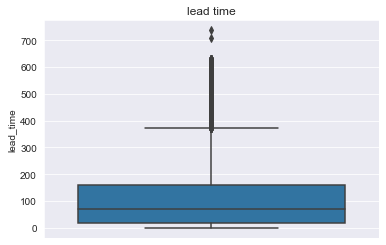

In [23]:
sns.boxplot(y=df['lead_time']);
plt.title('lead time')
plt.show()

#### Outlier Treatment

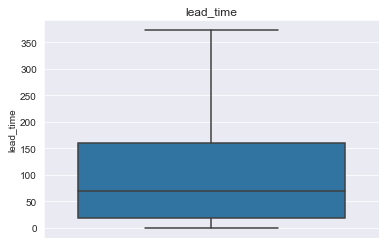

In [24]:
iqr = df['lead_time'].quantile(0.75) - df['lead_time'].quantile(0.25)
lower_range = df['lead_time'].quantile(0.25) - (iqr*1.5)
higher_range = df['lead_time'].quantile(0.75) + (iqr*1.5)
lower = df['lead_time'].quantile(0.25)
higher = df['lead_time'].quantile(0.75)
outlier_treated = np.where(df['lead_time'] > higher_range,higher,df['lead_time'])
df['lead_time'] = pd.DataFrame(outlier_treated)
outlier_treated = np.where(df['lead_time'] < lower_range,lower,df['lead_time'])
df['lead_time'] = pd.DataFrame(outlier_treated)
#verification
sns.boxplot(y = df['lead_time'])
plt.title('lead_time')
plt.show()

In [25]:
df[['arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month']].isnull().sum()

arrival_date_year            0
arrival_date_week_number     0
arrival_date_day_of_month    0
dtype: int64

#### Checking for Outliers

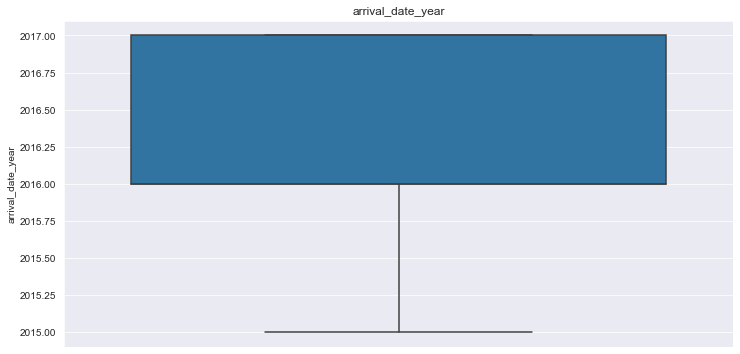

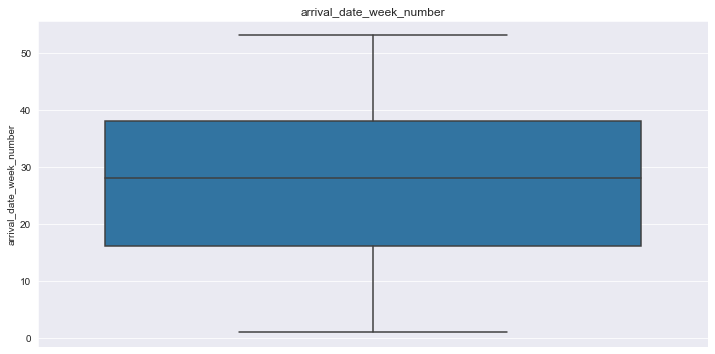

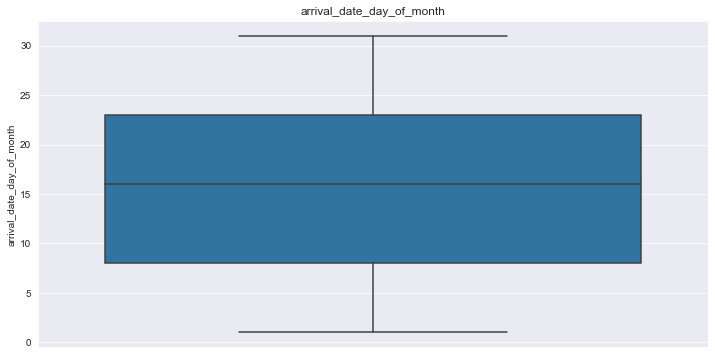

In [26]:
for feature in ['arrival_date_year','arrival_date_week_number', 'arrival_date_day_of_month']:
    plt.figure(figsize=(12,6))
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.show()

In [27]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_visitors,hotel_City Hotel,hotel_Resort Hotel
0,0,342.0,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1
1,0,160.0,2015,July,27,1,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,1
2,0,7.0,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,0,1
3,0,13.0,2015,July,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,0,1
4,0,14.0,2015,July,27,1,0,2,2,0.0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,0,1


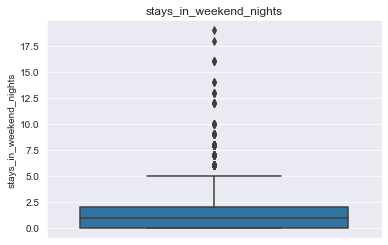

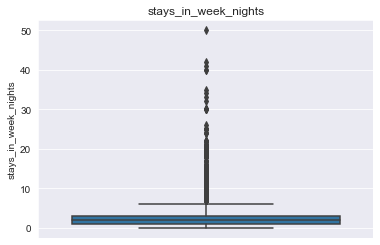

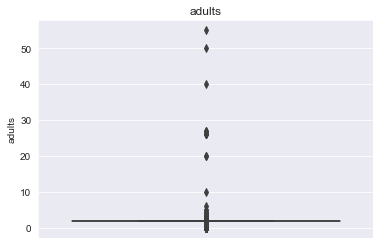

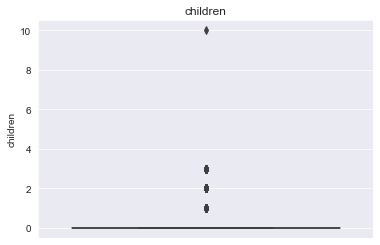

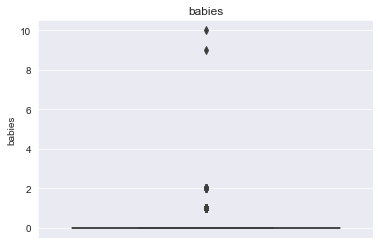

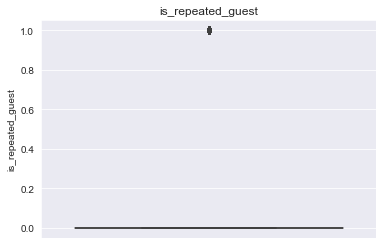

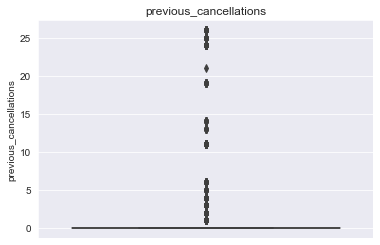

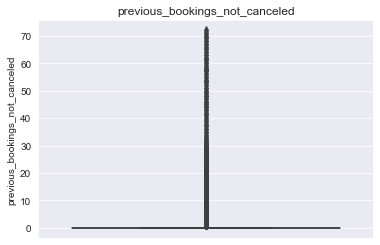

In [28]:
for feature in ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled']:
    sns.boxplot(y=df[feature])
    plt.title(feature)
    plt.show()

In [29]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [30]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

#### There are missing values so we need to do median value imputation

In [31]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [32]:
df['is_repeated_guest'].unique()

array([0, 1], dtype=int64)

In [33]:
df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72], dtype=int64)

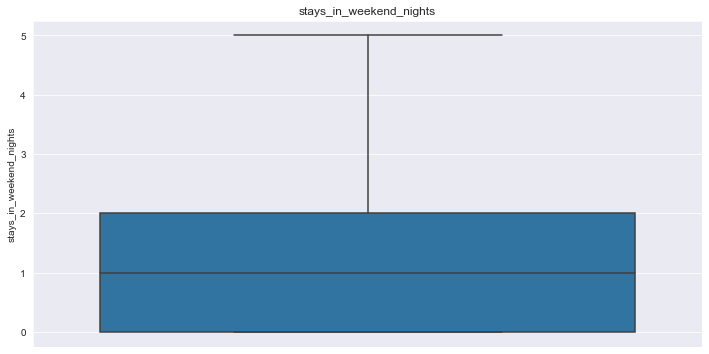

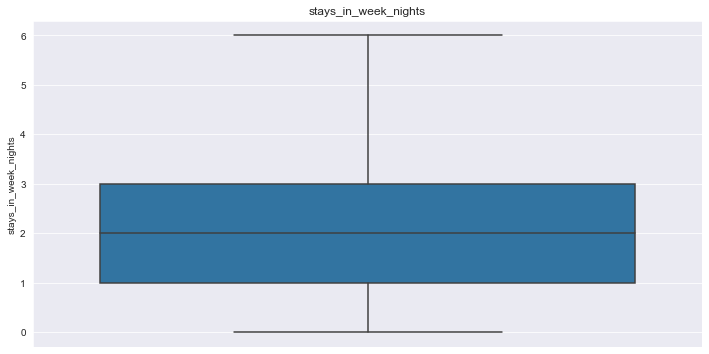

In [34]:
# Outliers treatment
for feature in ['stays_in_weekend_nights', 'stays_in_week_nights']:
    iqr = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_range = df[feature].quantile(0.25) - (1.5*iqr)
    higher_range = df[feature].quantile(0.75) + (1.5*iqr)
    lower = df[feature].quantile(0.25)
    higher = df[feature].quantile(0.75)
    outlier_treated = np.where(df[feature] > higher_range,higher,df[feature])
    df[feature] = pd.DataFrame(outlier_treated)
    outlier_treated = np.where(df[feature] < lower_range,lower,df[feature])
    df[feature] = pd.DataFrame(outlier_treated)
    ## Verification
    plt.figure(figsize=(12,6))
    sns.boxplot(y = df[feature])
    plt.title(feature)
    plt.show()
    

In [35]:
df[['booking_changes', 'agent']].isnull().mean()*100

booking_changes     0.000000
agent              13.686238
dtype: float64

In [36]:
df['agent'].fillna(df['agent'].median(),inplace=True)

In [37]:
df['company'].isnull().mean()*100

94.30689337465449

In [38]:
df.drop('company',inplace=True,axis=1)

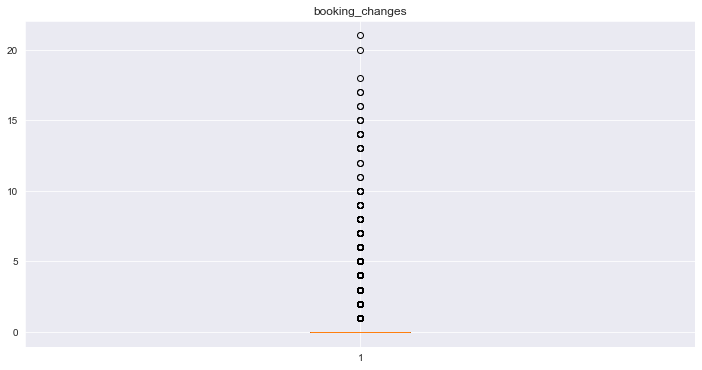

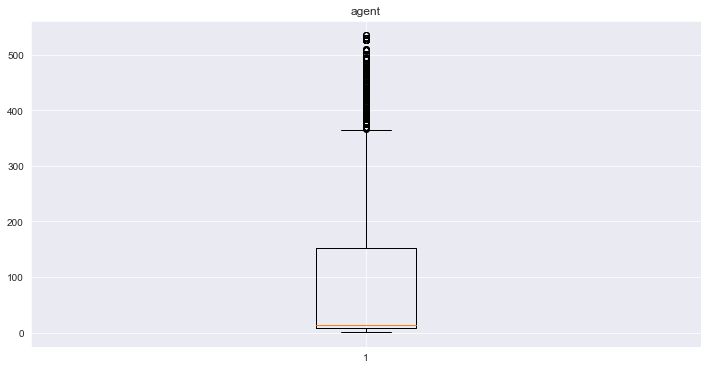

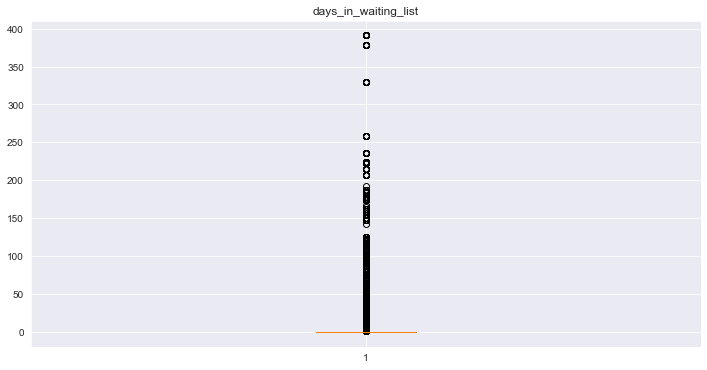

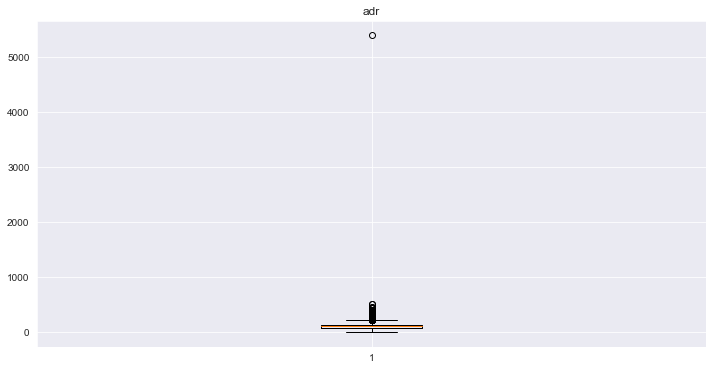

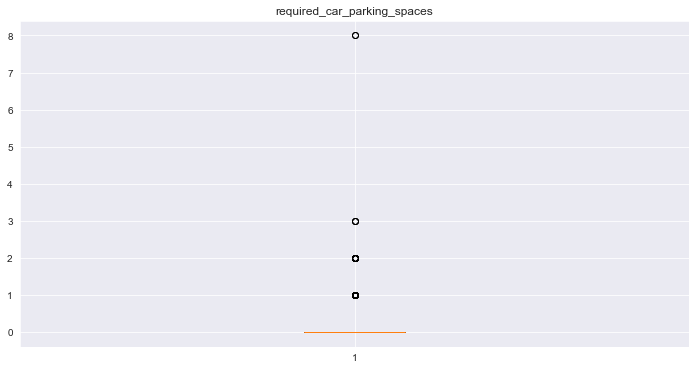

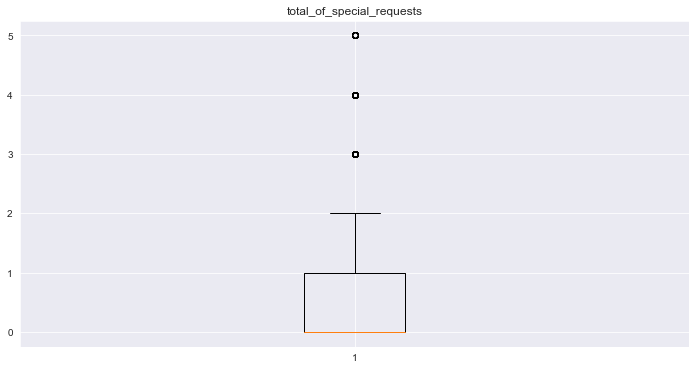

In [39]:
for feature in ['booking_changes', 'agent','days_in_waiting_list', 'adr', 'required_car_parking_spaces','total_of_special_requests']:
    plt.figure(figsize=(12,6))
    plt.boxplot(df[feature])
    plt.title(feature)
    plt.show()

In [40]:
len(df['booking_changes'].unique())

21

In [41]:
len(df['days_in_waiting_list'].unique())

128

In [42]:
len(df['adr'].unique())

8879

In [43]:
len(df['required_car_parking_spaces'].unique())

5

In [44]:
len(df['total_of_special_requests'].unique())

6

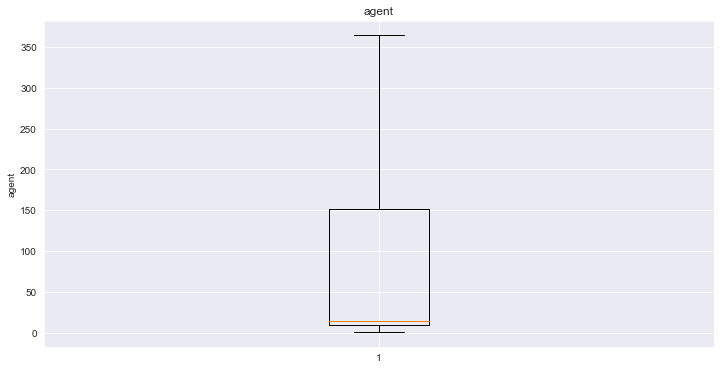

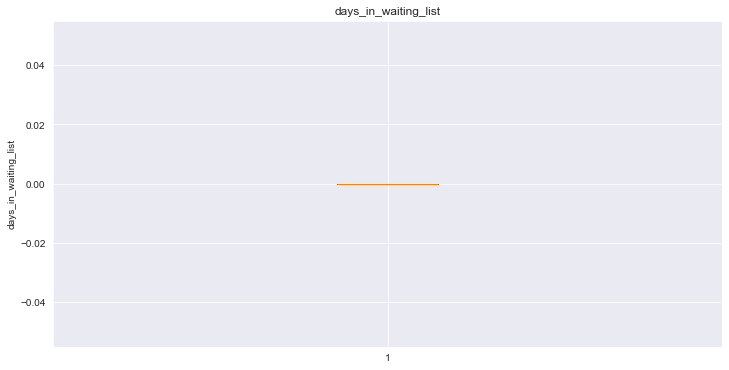

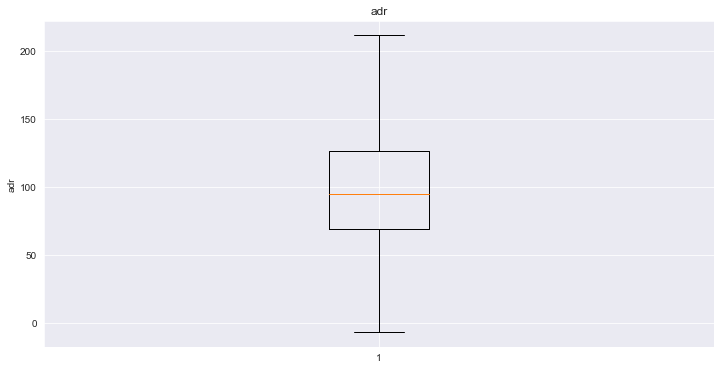

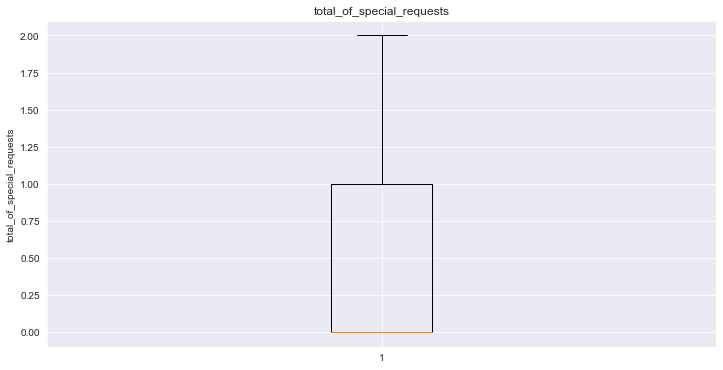

In [45]:
for feature in [ 'agent','days_in_waiting_list', 'adr','total_of_special_requests']:
    iqr = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_range = df[feature].quantile(0.25) - (1.5*iqr)
    higher_range = df[feature].quantile(0.75) + (1.5*iqr)
    lower = df[feature].quantile(0.25)
    higher = df[feature].quantile(0.75)
    treated = np.where(df[feature] < lower_range,lower,df[feature])
    df[feature] = pd.DataFrame(treated)
    treated = np.where(df[feature] > higher_range,higher,df[feature])
    df[feature] = pd.DataFrame(treated)
    ## CROSS VERIFICATION
    plt.figure(figsize=(12,6))
    plt.boxplot(df[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [46]:
categorical_cols.remove('hotel')

In [47]:
for feature in categorical_cols:
    print(df[feature].value_counts())
    print()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
ASM        1
BFA        1
DJI        1
NPL        1
AIA        1
Name: country, Length: 177, dtype: int64

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C  

In [48]:
cat_cols_not_encoded = []
for feature in categorical_cols:
    if len(df[feature].unique()) < 25 :
        df[feature] = LabelEncoder().fit_transform(df[feature])
    else:
        cat_cols_not_encoded.append(feature) 
print(cat_cols_not_encoded)
df[categorical_cols]

['country', 'reservation_status_date']


,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,5,0,PRT,3,1,2,2,0,2,1,2015-07-01
1,5,0,PRT,3,1,2,2,0,2,1,2015-07-01
2,5,0,GBR,3,1,0,2,0,2,1,2015-07-02
3,5,0,GBR,2,0,0,0,0,2,1,2015-07-02
4,5,0,GBR,6,3,0,0,0,2,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,BEL,5,3,0,0,0,2,1,2017-09-06
119386,1,0,FRA,6,3,4,4,0,2,1,2017-09-07
119387,1,0,DEU,6,3,3,3,0,2,1,2017-09-07
119388,1,0,GBR,6,3,0,0,0,2,1,2017-09-07


In [68]:
country_val = df['country'].unique()

In [ ]:
coun

In [76]:
c = np.where(df['country'].value_counts()/len(df['country'])*100 > 1 ,df['country'],'others')

ValueError: operands could not be broadcast together with shapes (177,) (119390,) () 

In [73]:
for i  in country_val:
    if 

PRT
GBR
USA
ESP
IRL
FRA
nan
ROU
NOR
OMN
ARG
POL
DEU
BEL
CHE
CN
GRC
ITA
NLD
DNK
RUS
SWE
AUS
EST
CZE
BRA
FIN
MOZ
BWA
LUX
SVN
ALB
IND
CHN
MEX
MAR
UKR
SMR
LVA
PRI
SRB
CHL
AUT
BLR
LTU
TUR
ZAF
AGO
ISR
CYM
ZMB
CPV
ZWE
DZA
KOR
CRI
HUN
ARE
TUN
JAM
HRV
HKG
IRN
GEO
AND
GIB
URY
JEY
CAF
CYP
COL
GGY
KWT
NGA
MDV
VEN
SVK
FJI
KAZ
PAK
IDN
LBN
PHL
SEN
SYC
AZE
BHR
NZL
THA
DOM
MKD
MYS
ARM
JPN
LKA
CUB
CMR
BIH
MUS
COM
SUR
UGA
BGR
CIV
JOR
SYR
SGP
BDI
SAU
VNM
PLW
QAT
EGY
PER
MLT
MWI
ECU
MDG
ISL
UZB
NPL
BHS
MAC
TGO
TWN
DJI
STP
KNA
ETH
IRQ
HND
RWA
KHM
MCO
BGD
IMN
TJK
NIC
BEN
VGB
TZA
GAB
GHA
TMP
GLP
KEN
LIE
GNB
MNE
UMI
MYT
FRO
MMR
PAN
BFA
LBY
MLI
NAM
BOL
PRY
BRB
ABW
AIA
SLV
DMA
PYF
GUY
LCA
ATA
GTM
ASM
MRT
NCL
KIR
SDN
ATF
SLE
LAO


In [61]:
df['country'] = np.where(df['country'].value_countsounts)

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object